In [7]:
# Example code to work with gene expression data, ISLR dataset NCI60 was used
# NCI60 consists of 6,830 gene expression measurements on 64 cancer cell lines.
# Unsupervised Learning
# Using PCA for dimension reduction, then clustering to predict cancer type
# Not using the cancer types in performing PCA and clustering, as these are unsupervised techniques.
# Dataset compatible with python was downloaded from https://github.com/emredjan/ISL-python/tree/master/datasets
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
style.use('ggplot')
import scipy.spatial
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [28]:
# work with NCI60 dataset
df = pd.read_csv('NCI60.csv')
print(df)

# Finding unique cancer types for later making the colormap
unique_words = df['labs'].unique()

y = np.array(df['labs'])
df.drop(['Unnamed: 0', 'labs'], 1, inplace = True )
X = np.array(df)

# print(X)
# print(y)

   Unnamed: 0    data.1    data.2    data.3    data.4    data.5        data.6  \
0          V1  0.300000  1.180000  0.550000  1.140000 -0.265000 -7.000000e-02   
1          V2  0.679961  1.289961  0.169961  0.379961  0.464961  5.799610e-01   
2          V3  0.940000 -0.040000 -0.170000 -0.040000 -0.605000  0.000000e+00   
3          V4  0.280000 -0.310000  0.680000 -0.810000  0.625000 -1.387779e-17   
4          V5  0.485000 -0.465000  0.395000  0.905000  0.200000 -5.000000e-03   
..        ...       ...       ...       ...       ...       ...           ...   
59        V60 -0.030000 -0.480000  0.070000 -0.700000 -0.195000  4.100000e-01   
60        V61 -0.270000  0.630000 -0.100000  1.100000  1.045000  8.000000e-02   
61        V62  0.210000 -0.620000 -0.150000 -1.330000  0.045000 -4.000000e-01   
62        V63 -0.050000  0.140000 -0.090000 -1.260000  0.045000 -2.710505e-20   
63        V64  0.350000 -0.270000  0.020000 -1.230000 -0.715000 -3.400000e-01   

      data.7    data.8    d

C:\Users\mahva\AppData\Local\Temp/ipykernel_19488/370971691.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['Unnamed: 0', 'labs'], 1, inplace = True )


In [ ]:
# Create a colormap
cmap = cm.get_cmap('tab10')
colorsCan = {}
# Make a dict to assign a color to each cancer type
for cancer, color in zip(unique_words, cmap.colors):
    colorsCanc[cancer] = color

# Print the dictionary
print(len(colorsCanc))
print(colorsCanc)

In [ ]:
# Compute the principal components
pca = PCA(n_components=64)
pca.fit(X)
fig, ax = plt.subplots()
for i in range(len(y)):
    color = np.array([colorsCanc[y[i]]])
    plt.scatter(pca.transform(X)[i, 0], pca.transform(X)[i, 1], c = color)

# Add axis labels
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')

# Plot the first few principal component score vectors
# plt.scatter(pca.transform(X)[:, 0], pca.transform(X)[:, 1], 'o', c = colors(y[i]))
plt.show()

In [ ]:
fig, ax = plt.subplots()

for i in range(len(y)):
    color = np.array([colorsCanc[y[i]]])
    plt.scatter(pca.transform(X)[i, 0], pca.transform(X)[i, 2], c = color)

# Add axis labels
ax.set_xlabel('Z1')
ax.set_ylabel('Z3')

# Plot the first few principal component score vectors
plt.show()

In [ ]:
# plotting PVE proportion of variance explained
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(explained_variance_ratio*100, marker='o') 
plt.show()
# Elbow after the 7th PC

In [ ]:
# Cumulative PVE proportion of variance explained
CumSum = [0]*len(explained_variance_ratio)
# print(len(CumSum))
for i in range(len(explained_variance_ratio)):
    if i > 0:
        CumSum[i] = explained_variance_ratio[i]*100 + CumSum[i-1]
    else:
        CumSum[i] = [0]
        
plt.plot(CumSum, marker = 'o')
plt.show()
# Less than first 10 PCs explain 40% of the Variance in the data

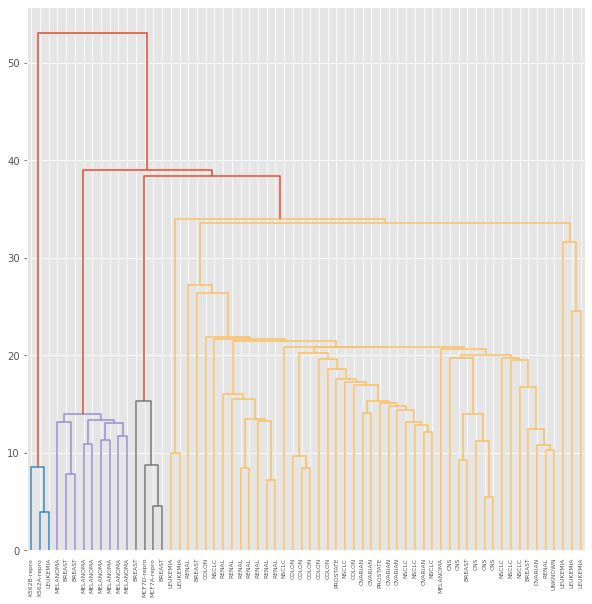

CNS 6
CNS 6
CNS 6
RENAL 11
BREAST 10
CNS 6
CNS 6
BREAST 6
NSCLC 6
NSCLC 6
RENAL 5
RENAL 5
RENAL 5
RENAL 5
RENAL 5
RENAL 5
RENAL 5
BREAST 6
NSCLC 6
RENAL 6
UNKNOWN 6
OVARIAN 6
MELANOMA 6
PROSTATE 6
OVARIAN 6
OVARIAN 6
OVARIAN 6
OVARIAN 6
OVARIAN 6
PROSTATE 6
NSCLC 6
NSCLC 6
NSCLC 6
LEUKEMIA 14
K562B-repro 1
K562A-repro 1
LEUKEMIA 1
LEUKEMIA 12
LEUKEMIA 4
LEUKEMIA 4
LEUKEMIA 13
COLON 6
COLON 6
COLON 6
COLON 6
COLON 6
COLON 9
COLON 6
MCF7A-repro 3
BREAST 3
MCF7D-repro 3
BREAST 3
NSCLC 6
NSCLC 7
NSCLC 8
MELANOMA 2
BREAST 2
BREAST 2
MELANOMA 2
MELANOMA 2
MELANOMA 2
MELANOMA 2
MELANOMA 2
MELANOMA 2


In [20]:
# Peforming Hierarchical clustering using the first 7 PCAs
pca = PCA(n_components=7)
df_pca = pca.fit_transform(X)

sl_mergings = linkage(df_pca, method="single", metric='euclidean')
# print(sl_mergings)
dendrogram(sl_mergings, labels=y) # Create a dendrogram of the PCA results
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# we have 14 different cancertypes, let's cluster into 14 clusters to see how accurate the hierarchical clustering is!
clusters = fcluster(sl_mergings, 14, criterion='maxclust')

# Print the clusters and labs next to each other for comparison by eye
res = "\n".join("{} {}".format(x, y) for x, y in zip(y, clusters))
print(res)


In [27]:
# checking the crosstab of the actual labs and the clusters
acc = pd.DataFrame({'labels': y, 'clusters': clusters})
# print(acc)
ct = pd.crosstab(acc['labels'], acc['clusters'])
# print(ct)

clusters     1   2   3   4   5   6   7   8   9   10  11  12  13  14
labels                                                             
BREAST        0   2   2   0   0   2   0   0   0   1   0   0   0   0
CNS           0   0   0   0   0   5   0   0   0   0   0   0   0   0
COLON         0   0   0   0   0   6   0   0   1   0   0   0   0   0
K562A-repro   1   0   0   0   0   0   0   0   0   0   0   0   0   0
K562B-repro   1   0   0   0   0   0   0   0   0   0   0   0   0   0
LEUKEMIA      1   0   0   2   0   0   0   0   0   0   0   1   1   1
MCF7A-repro   0   0   1   0   0   0   0   0   0   0   0   0   0   0
MCF7D-repro   0   0   1   0   0   0   0   0   0   0   0   0   0   0
MELANOMA      0   7   0   0   0   1   0   0   0   0   0   0   0   0
NSCLC         0   0   0   0   0   7   1   1   0   0   0   0   0   0
OVARIAN       0   0   0   0   0   6   0   0   0   0   0   0   0   0
PROSTATE      0   0   0   0   0   2   0   0   0   0   0   0   0   0
RENAL         0   0   0   0   7   1   0   0   0 